# Homework 2
Due Monday, Feb. 6 \
Tristan Larkin

### Problem 1
Suppose that you roll 10 dice. Calculate the probability that “x” dice will land with the number 4 up. Note that “x” is a random variable that can take values from 0 to 10. 


Plot the probability distribution for the random variable “x”. (use matlab) 


The chance of x dice landing on 4 when 10 dice are thrown will be:
$$ (\frac{1}{6})^x (\frac{5}{6})^{10-x} {10 \choose x} $$
which can be read as the probability of x dice landing on 4 times the probabilty of 10 - x dice landing on a number other than 4 times the number of ways those dice can be aranged.

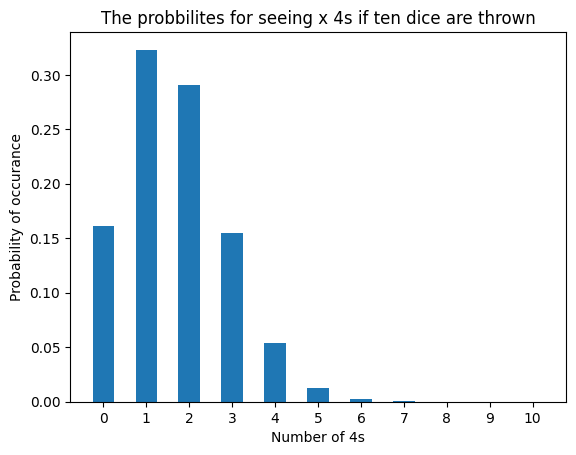

    0      1      2      3       4      5        6         7         8         9        10
-----  -----  -----  -----  ------  -----  -------  --------  --------  --------  --------
0.162  0.323  0.291  0.155  0.0543  0.013  0.00217  0.000248  1.86e-05  8.27e-07  1.65e-08
Sanity check: sum of ps = 1.0000000000000002


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

# Probability that x dice will land with a 4 if 10 dice are thrown
def p_4s(x:int) -> float:
    return (1/6)**x * (5/6)**(10-x) * math.comb(10, x)

xs = np.arange(11)
ps = [p_4s(x) for x in xs]
plt.bar(xs, ps, 0.5)
plt.xlabel("Number of 4s")
plt.xticks(range(11))
plt.ylabel("Probability of occurance")
plt.title("The probbilites for seeing x 4s if ten dice are thrown")
plt.show()
print(tabulate([ps], headers=xs, floatfmt=".3"))
print(f"Sanity check: sum of ps = {sum(ps)}")


What is the mean and standard deviation of the distribution?


In a Poisson distribution the mean and std are caluclated with the formulas:
$$ \lambda =  \sum_i{x_i P(x_i)} = \dfrac{\sum_i{x_i n_i}}{N} $$
$$ \sigma_x = \sqrt{\lambda} $$
Where:
- $i$ is the number of elements
- $x_i$ is the $i^{\text{th}}$ element
- $n_i$ is the weight for $x_i$
- $N$ is the sum of all $n_i$

In [2]:
weighted_values = [x*p for x, p in zip(xs,ps)]
p_avg = sum(weighted_values)
p_std = np.sqrt(p_avg)
print(f"The average number of 4s you will get is {p_avg:.3f}")
print(f"The standard deviation of the distribution is {p_std:.3f}")

The average number of 4s you will get is 1.667
The standard deviation of the distribution is 1.291


### Problem 2 (Bevington 2.12) 
Members of a large collaboration that operated a giant proton-decay detector in a salt mine near Cleveland, Ohio, detected a burst of 8 neutrinos in their apparatus coincident with the optical observation of the explosion of the Supernova 1987A. 


(a) If the average number of neutrinos detected in the apparatus is 2 per day, what is the probability of detecting a fluctuation of 8 or more in one day? 


We are only given an average so we will assume Poisson distribution where λ=2. Then we can use the function:
$$ Pr_\lambda(k) = \frac{\lambda^k e^{-\lambda}}{k!}

In [3]:
def poisson_pr(param, k)-> float:
    return (param**k * np.exp(-param))/(math.factorial(k))

print(f"The probability of seeing 8 events in a day instead of 2 is {poisson_pr(2, 8):.4e}")

The probability of seeing 8 events in a day instead of 2 is 8.5927e-04


(b) In fact, the 8 neutrinos were all detected within a 10-min period. What is the probability of detecting a fluctuation of 8 or more neutrinos in a 10-min period if the average rate is 2 per 24 hours? 

In [4]:
# we will have to come up with a new parameter for per minute instead of per day
min_in_day = 24 * 60
param_new = 2/(min_in_day / 10)

# this new paramerter is the average number of events seen in a 10 minute span

print(f"The probability of seeing 8 events in 10 minutes is {poisson_pr(param_new, 8):.4e}")

The probability of seeing 8 events in 10 minutes is 3.3868e-20


### Problem 3 (Bevington 3.9) 
Students in an undergraduate laboratory recorded the following counts in 1-min intervals from a radioactive source.  The nominal mean decay rate of the source is `3.7` decays per minute. 

In [5]:
from tabulate import tabulate
dpm = [i for i in range(11)] # decays per minute
fs = [1, 9, 20, 24, 19, 11, 11, 0, 3, 1, 1] # frequencies
print(tabulate([dpm, fs], showindex=["Decays/min", "Fequency of occurances"]))

----------------------  -  -  --  --  --  --  --  -  -  -  --
Decays/min              0  1   2   3   4   5   6  7  8  9  10
Fequency of occurances  1  9  20  24  19  11  11  0  3  1   1
----------------------  -  -  --  --  --  --  --  -  -  -  --



(a) Find the mean decay rate and its standard deviation. Compare the standard deviation to the value expected from the Poisson distribution for the mean value that you obtained. 


In [6]:
weighted_dpm = [f*d for f, d in zip(fs, dpm)]
N = sum(fs)

dpm_avg = sum(weighted_dpm)/N
print(f"The average number of decays per minute is {dpm_avg}.")

dpm_std = np.sqrt(dpm_avg)
print(f"The standard deviation of decays per minute is {dpm_std:.2f}.")

print(f"We expected the standard deviation to be √3.7=\
{np.sqrt(3.7):.3} and we observed it to be {dpm_std}.")

print(f"This is very close. Its only a difference of \
{np.sqrt(3.7) - dpm_std:.2e} and {(np.sqrt(3.7) - dpm_std)/np.sqrt(3.7):.3%} off.")


The average number of decays per minute is 3.61.
The standard deviation of decays per minute is 1.90.
We expected the standard deviation to be √3.7=1.92 and we observed it to be 1.9.
This is very close. Its only a difference of 2.35e-02 and 1.224% off.


(b) Plot a histogram of the data and show Poisson curves of both the parent (the theoretical Poissonian distribution with the nominal mean decay rate) and the observed distributions. 

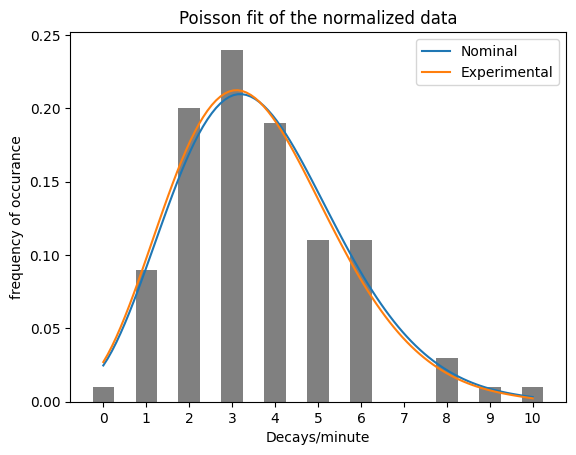

In [7]:
from scipy import interpolate

# we can take a sample of predicted points on each of the Poisson graphs and plot both of them

p_nominal = 3.7
p_experimental = dpm_avg

def plot_poisson(param:float, max:float, resolution=100) -> None:
    # xs = np.linspace(0, max, resolution)
    xs_int = np.arange(max)
    xs = np.linspace(0, max, resolution)
    ys_int = [poisson_pr(param, k) for k in xs_int]
    f = interpolate.CubicSpline(xs_int, ys_int)
    ys = [f(x) for x in xs]
    plt.plot(xs, ys)

fs_normalized = [f/N for f in fs]
plt.bar(dpm, fs_normalized, 0.5, color='gray')
plt.xticks(dpm)
plt.xlabel("Decays/minute")
plt.ylabel("frequency of occurance")

plot_poisson(p_nominal, 10)
plot_poisson(p_experimental, 10)
plt.legend(["Nominal", "Experimental"])

plt.title("Poisson fit of the normalized data")
plt.show()